In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_NIR5Yl1.csv')

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,330045.0,235748.682789,136039.418471,1.0,117909.0,235699.0,353620.0,471493.0
Reputation,330045.0,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,81442.888803,49215.100730,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


In [6]:
df.tail()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0
330044,300553,j,2001.0,4.0,154692,2554.0,37.0


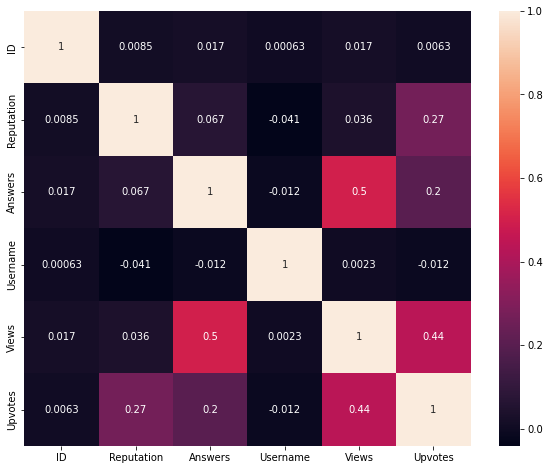

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Checking for outliers

ID 



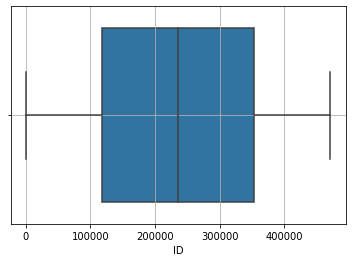

---------------------------------------------------------------------------------------------------- 

Reputation 



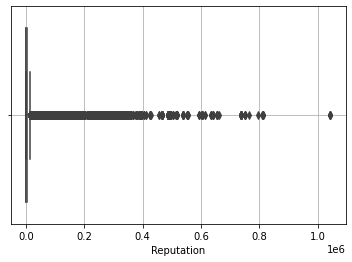

---------------------------------------------------------------------------------------------------- 

Answers 



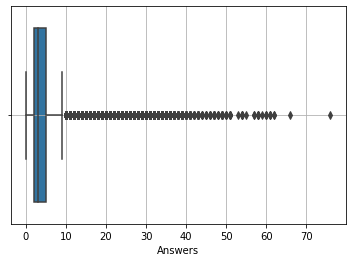

---------------------------------------------------------------------------------------------------- 

Username 



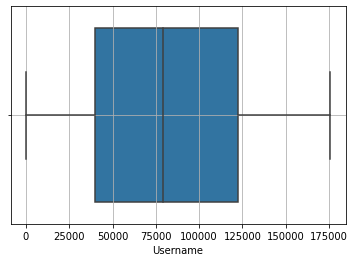

---------------------------------------------------------------------------------------------------- 

Views 



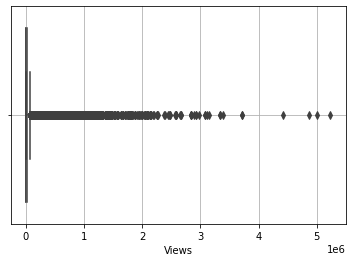

---------------------------------------------------------------------------------------------------- 

Upvotes 



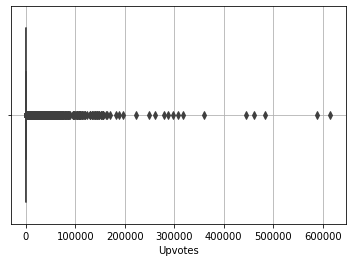

---------------------------------------------------------------------------------------------------- 



In [8]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i,'\n')
        sns.boxplot(df[i])
        plt.grid()
        plt.show()
        
        print('--'*50,'\n')

In [9]:
tag_upv = pd.DataFrame(df.Upvotes.groupby(df.Tag).mean().sort_values(ascending=False))
tag_upv['Tag'] = tag_upv.index
tag_upv.index = np.arange(0,len(tag_upv))
tag_upv.head()

,Upvotes,Tag
0,540.364686,j
1,407.351971,p
2,384.719704,h
3,327.569916,c
4,316.460136,a


In [10]:
ans_upv = pd.DataFrame(df.Upvotes.groupby(df.Answers).mean().sort_values(ascending=False))
ans_upv['ans'] = ans_upv.index
ans_upv.index = np.arange(0,len(ans_upv))
ans_upv.head()

,Upvotes,ans
0,261157.000000,59.0
1,153559.000000,66.0
2,84511.000000,53.0
3,49615.250000,50.0
4,44990.916667,39.0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### OLS

In [12]:
# import statsmodels.api as sm

In [13]:
# x = df.drop('Upvotes',1)
# y = df.Upvotes

In [14]:
# x = sm.add_constant(x)

In [15]:
# x.drop('Tag',axis=1,inplace=True)

In [16]:
# model = sm.OLS(y,x)
# result = model.fit()

In [17]:
# result.tvalues

In [18]:
# result.pvalues

In [19]:
# result.summary()

### Data preprocessing

In [47]:
ml = df.copy()

In [48]:
# ids = ml.ID.tolist()

In [49]:
ml.drop(['ID','Username'],axis=1,inplace=True)

In [23]:
le = LabelEncoder()

In [50]:
ml.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [54]:
t = []
for i in ml.Tag:
    if i == 'c':
        t.append(1)
    elif i == 'j':
        t.append(2)
    elif i == 'p':
        t.append(3)
    elif i == 'i':
        t.append(4)
    elif i == 'a':
        t.append(5)
    elif i == 's':
        t.append(6)
    elif i == 'h':
        t.append(7)
    elif i == 'o':
        t.append(8)
    elif i == 'r':
        t.append(9)
    elif i == 'x':
        t.append(10)
ml['Tag'] = t
    

In [55]:
# ml['Tag'] = le.fit_transform(ml['Tag'])

In [56]:
ml.head()

,Tag,Reputation,Answers,Views,Upvotes
0,5,3942.0,2.0,7855.0,42.0
1,5,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,5,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [57]:
lr = LinearRegression()
kn = KNeighborsRegressor()
svm = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cat = CatBoostRegressor(verbose=False)
lgb = LGBMRegressor()

In [58]:
x = ml.drop('Upvotes',1)
y = ml.Upvotes

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=44)

In [60]:
## train scores
lr.fit(xtrain,ytrain)
lr_train_pred = lr.predict(xtrain)
lr_train_r2 = r2_score(ytrain,lr_train_pred)
lr_train_rmse = np.sqrt(mean_squared_error(ytrain,lr_train_pred))
print("train_r2   : ",lr_train_r2)
print("train rmse : ",lr_train_rmse)
## test scores
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_r2 = r2_score(ytest,lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(ytest,lr_test_pred))
print("test_r2   : ",lr_test_r2)
print("test rmse : ",lr_test_rmse)

train_r2   :  0.2394831665248741
train rmse :  3298.3828636785997
test_r2   :  0.37903979117946995
test rmse :  2130.1020117023004


In [61]:
## train scores
kn.fit(xtrain,ytrain)
kn_train_pred = kn.predict(xtrain)
kn_train_r2 = r2_score(ytrain,kn_train_pred)
kn_train_rmse = np.sqrt(mean_squared_error(ytrain,kn_train_pred))
print("train_r2   : ",kn_train_r2)
print("train rmse : ",kn_train_rmse)
## test scores
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_r2 = r2_score(ytest,kn_test_pred)
kn_test_rmse = np.sqrt(mean_squared_error(ytest,kn_test_pred))
print("test_r2   : ",kn_test_r2)
print("test rmse : ",kn_test_rmse)

train_r2   :  0.8080929012822688
train rmse :  1656.8842502490497
test_r2   :  0.818176340694727
test rmse :  1152.6400715881487


In [62]:
# %%time
# ## train scores
# svm.fit(xtrain,ytrain)
# svm_train_pred = svm.predict(xtrain)
# svm_train_r2 = r2_score(ytrain,svm_train_pred)
# svm_train_rmse = np.sqrt(mean_squared_error(ytrain,svm_train_pred))
# print("train_r2   : ",svm_train_r2)
# print("train rmse : ",svm_train_rmse)
# ## test scores
# svm.fit(xtrain,ytrain)
# svm_test_pred = svm.predict(xtest)
# svm_test_r2 = r2_score(ytest,svm_test_pred)
# svm_test_rmse = np.sqrt(mean_squared_error(ytest,svm_test_pred))
# print("test_r2   : ",svm_test_r2)
# print("test rmse : ",svm_test_rmse)

In [63]:
# %%time
# ## train scores
# rf.fit(xtrain,ytrain)
# rf_train_pred = rf.predict(xtrain)
# rf_train_r2 = r2_score(ytrain,rf_train_pred)
# rf_train_rmse = np.sqrt(mean_squared_error(ytrain,rf_train_pred))
# print("train_r2   : ",rf_train_r2)
# print("train rmse : ",rf_train_rmse)
# ## test scores
# rf.fit(xtrain,ytrain)
# rf_test_pred = rf.predict(xtest)
# rf_test_r2 = r2_score(ytest,rf_test_pred)
# rf_test_rmse = np.sqrt(mean_squared_error(ytest,rf_test_pred))
# print("test_r2   : ",rf_test_r2)
# print("test rmse : ",rf_test_rmse)

In [64]:
## train scores
dt.fit(xtrain,ytrain)
dt_train_pred = dt.predict(xtrain)
dt_train_r2 = r2_score(ytrain,dt_train_pred)
dt_train_rmse = np.sqrt(mean_squared_error(ytrain,dt_train_pred))
print("train_r2   : ",dt_train_r2)
print("train rmse : ",dt_train_rmse)
## test scores
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_r2 = r2_score(ytest,dt_test_pred)
dt_test_rmse = np.sqrt(mean_squared_error(ytest,dt_test_pred))
print("test_r2   : ",dt_test_r2)
print("test rmse : ",dt_test_rmse)

train_r2   :  0.999999997830733
train rmse :  0.1761583186959092
test_r2   :  0.7710098281630846
test rmse :  1293.5312891606686


In [65]:
## train scores
gb.fit(xtrain,ytrain)
gb_train_pred = gb.predict(xtrain)
gb_train_r2 = r2_score(ytrain,gb_train_pred)
gb_train_rmse = np.sqrt(mean_squared_error(ytrain,gb_train_pred))
print("train_r2   : ",gb_train_r2)
print("train rmse : ",gb_train_rmse)
## test scores
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_r2 = r2_score(ytest,gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(ytest,gb_test_pred))
print("test_r2   : ",gb_test_r2)
print("test rmse : ",gb_test_rmse)

train_r2   :  0.9629807310563165
train rmse :  727.7137298308267
test_r2   :  0.9079144866824888
test rmse :  820.2838733659413


In [66]:
## train scores
xgb.fit(xtrain,ytrain)
xgb_train_pred = xgb.predict(xtrain)
xgb_train_r2 = r2_score(ytrain,xgb_train_pred)
xgb_train_rmse = np.sqrt(mean_squared_error(ytrain,xgb_train_pred))
print("train_r2   : ",xgb_train_r2)
print("train rmse : ",xgb_train_rmse)
## test scores
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_r2 = r2_score(ytest,xgb_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(ytest,xgb_test_pred))
print("test_r2   : ",xgb_test_r2)
print("test rmse : ",xgb_test_rmse)

train_r2   :  0.9928116268043645
train rmse :  320.6726774124088
test_r2   :  0.8559136369005813
test rmse :  1026.077008770077


In [67]:
## train scores
xgbrf.fit(xtrain,ytrain)
xgbrf_train_pred = xgbrf.predict(xtrain)
xgbrf_train_r2 = r2_score(ytrain,xgbrf_train_pred)
xgbrf_train_rmse = np.sqrt(mean_squared_error(ytrain,xgbrf_train_pred))
print("train_r2   : ",xgbrf_train_r2)
print("train rmse : ",xgbrf_train_rmse)
## test scores
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_r2 = r2_score(ytest,xgbrf_test_pred)
xgbrf_test_rmse = np.sqrt(mean_squared_error(ytest,xgbrf_test_pred))
print("test_r2   : ",xgbrf_test_r2)
print("test rmse : ",xgbrf_test_rmse)

train_r2   :  0.9608344578788803
train rmse :  748.5119202766799
test_r2   :  0.8460619128888314
test rmse :  1060.5754247337277


In [68]:
## train scores
cat.fit(xtrain,ytrain)
cat_train_pred = cat.predict(xtrain)
cat_train_r2 = r2_score(ytrain,cat_train_pred)
cat_train_rmse = np.sqrt(mean_squared_error(ytrain,cat_train_pred))
print("train_r2   : ",cat_train_r2)
print("train rmse : ",cat_train_rmse)
## test scores
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_r2 = r2_score(ytest,cat_test_pred)
cat_test_rmse = np.sqrt(mean_squared_error(ytest,cat_test_pred))
print("test_r2   : ",cat_test_r2)
print("test rmse : ",cat_test_rmse)

train_r2   :  0.9677763615054696
train rmse :  678.9439741883238
test_r2   :  0.6990207334288645
test rmse :  1482.985164972081


In [69]:
## train scores
lgb.fit(xtrain,ytrain)
lgb_train_pred = lgb.predict(xtrain)
lgb_train_r2 = r2_score(ytrain,lgb_train_pred)
lgb_train_rmse = np.sqrt(mean_squared_error(ytrain,lgb_train_pred))
print("train_r2   : ",lgb_train_r2)
print("train rmse : ",lgb_train_rmse)
## test scores
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_r2 = r2_score(ytest,lgb_test_pred)
lgb_test_rmse = np.sqrt(mean_squared_error(ytest,lgb_test_pred))
print("test_r2   : ",lgb_test_r2)
print("test rmse : ",lgb_test_rmse)

train_r2   :  0.8346103121003544
train rmse :  1538.1576991854631
test_r2   :  0.7419606925479179
test rmse :  1373.129351678018


In [70]:
evals = pd.DataFrame({'Model':['LR','DT','CAT','LGBM','XGB','GB','XGBRF','KNN'],
             'Train_R2':[lr_train_r2,dt_train_r2,cat_train_r2,
                         lgb_train_r2,xgb_train_r2,gb_train_r2,xgbrf_train_r2,kn_train_r2],
             'Test_R2':[lr_test_r2,dt_test_r2,cat_test_r2,lgb_test_r2,xgb_test_r2,gb_test_r2,xgbrf_test_r2,kn_test_r2],
             'Train_RMSE':[lr_train_rmse,dt_train_rmse,cat_train_rmse,
                           lgb_train_rmse,xgb_train_rmse,gb_train_rmse,xgbrf_train_rmse,kn_train_rmse],
             'Test_RMSE':[lr_test_rmse,dt_test_rmse,cat_test_rmse,
                          lgb_test_rmse,xgb_test_rmse,gb_test_rmse,xgbrf_test_rmse,kn_test_rmse]})

In [71]:
evals.sort_values('Test_R2',ascending=False)

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
5,GB,0.962981,0.907914,727.713730,820.283873
4,XGB,0.992812,0.855914,320.672677,1026.077009
6,XGBRF,0.960834,0.846062,748.511920,1060.575425
7,KNN,0.808093,0.818176,1656.884250,1152.640072
1,DT,1.000000,0.771010,0.176158,1293.531289
3,LGBM,0.834610,0.741961,1538.157699,1373.129352
2,CAT,0.967776,0.699021,678.943974,1482.985165
0,LR,0.239483,0.379040,3298.382864,2130.102012


In [72]:
test = pd.read_csv('test_8i3B3FC.csv')

In [73]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          141448 non-null  int64  
 1   Tag         141448 non-null  object 
 2   Reputation  141448 non-null  float64
 3   Answers     141448 non-null  float64
 4   Username    141448 non-null  int64  
 5   Views       141448 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [78]:
ids = test['ID'].tolist()

In [77]:
t = []
for i in test.Tag:
    if i == 'c':
        t.append(1)
    elif i == 'j':
        t.append(2)
    elif i == 'p':
        t.append(3)
    elif i == 'i':
        t.append(4)
    elif i == 'a':
        t.append(5)
    elif i == 's':
        t.append(6)
    elif i == 'h':
        t.append(7)
    elif i == 'o':
        t.append(8)
    elif i == 'r':
        t.append(9)
    elif i == 'x':
        t.append(10)
test['Tag'] = t
    

In [79]:
test.drop(['ID','Username'],axis=1,inplace=True)

In [80]:
test.head()

,Tag,Reputation,Answers,Views
0,5,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,4,927.0,1.0,21167.0
3,4,21.0,6.0,18528.0
4,4,4475.0,10.0,57240.0


In [90]:
cat.fit(x,y)

In [91]:
import pickle

In [92]:
pickle.dump(cat, open('catboost.pkl', 'wb'))

In [98]:
model = pickle.load(open('gradient_boost.pkl' , 'rb'))

In [99]:
final = model.predict(test)

In [100]:
final_preds = pd.DataFrame({'ID':ids,'Upvotes':np.absolute(final)})

In [101]:
final_preds.to_csv('exp1_gb_base.csv',index=False)